<a href="https://colab.research.google.com/github/DavidELP17/TS3_MiniProyecto1/blob/master/TS3_MiniProyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adquisición de datos y aplicación de técnicas de preprocesamiento para resolver un problema particular**
## ***Mini-Proyecto 1: Análisis de bio-señales para computación afectiva***
### *Tratamiento de señales III*

Facultad de Ingeniería, Universidad de Antioquia

2023-2

### **Descripción**

La emoción es un proceso psicofisiológico desencadenado por la percepción consciente y/o inconsciente de un objeto o situación y, a menudo, se asocia con el estado de ánimo, el temperamento, la personalidad, la disposición y la motivación. Las emociones juegan un papel importante en la comunicación humana y pueden expresarse verbalmente a través del vocabulario emocional o mediante la expresión de señales no verbales como la entonación de la voz, las expresiones faciales y los gestos. La mayoría de los sistemas contemporáneos de interacción humano-computadora (HCI) son deficientes en la interpretación de esta información y carecen de inteligencia emocional. En otras palabras, no pueden identificar los estados emocionales humanos y utilizar esta información para decidir las acciones adecuadas que ejecutar. El objetivo de la computación afectiva es llenar este vacío detectando señales emocionales que ocurren durante la interacción humano-computadora y sintetizando respuestas emocionales.

La evaluación de las emociones a menudo se lleva a cabo mediante el análisis de las expresiones emocionales y/o señales fisiológicas de los usuarios. Las expresiones emocionales se refieren a cualquier comportamiento verbal y no verbal observable que comunica emoción. Hasta ahora, la mayoría de los estudios sobre evaluación de emociones se han centrado en el análisis de las expresiones faciales y el habla para determinar el estado emocional de una persona. También se sabe que las señales fisiológicas incluyen información emocional que se puede utilizar para evaluar las emociones, pero han recibido menos atención. Estas comprenden las señales que se originan en el sistema nervioso central (SNC) y el sistema nervioso periférico (SNP).

### **Actividad de aprendizaje**

1. Se requiere construir un framework que permita procesar y caracterizar las señales fisiológicas para agruparlas en estados emocionales. Para ello, se trabajará con la base de datos DEAPdataset, la cual es un conjunto de datos para el análisis de emociones usando señales de EEG, fisiológicas y de video (ver figura 1).

![Figura 1. Ejemplo de la base de datos DEAP](https://github.com/DavidELP17/TS3_MiniProyecto1/assets/17619940/14193f64-aadd-49d8-966d-3466e1f62b56)

<p align="center"><b> Figura 1.</b>  Ejemplo de la base de datos DEAP.</p>


2. El objetivo de este mini-proyecto es realizar la caracterización de los estados emocionales de la siguiente manera:

Seleccionar al menos 3 características por cada tipo de señal en la base de datos. La siguiente tabla muestra las características más relevantes que deben extraerse de un proceso emocional.


| **Signal** | **Extracted features** |
|:--------------:|:--------------|
| GSR  | - Average skin resistance.<br> - Average of derivative.<br> - Average of derivative for negative values only (average decrease rate during decay time).<br> - Proportion of negative samples in the derivative vs. all samples.<br> - Number of local minima in the GSR signal<br> - Average rising time of the GSR signal.<br> - Spectral power in the [0-2.4]Hz bands.<br> - Zero crossing rate of Skin conductance slow response (SCSR) [0-0.2]Hz.<br> - Zero crossing rate of Skin conductance very slow response (SCVSR) [0-0.08]Hz.<br> - Mean of peaks magnitude in SCSR and SCVSR.  |
| Blood volume pressure  | - Average and standard deviation of HR, HRV, and inter beat intervals.<br> - Energy ratio between the frequency bands [0.04-0.15]Hz and [0.15-0.5]Hz.<br> - Spectral power in the bands ([0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz).<br> - Low frequency [0.01-0.08]Hz, medium frequency [0.08-0.15]Hz, and high frequency [0.15-0.5]Hz components of HRV power spectrum.  |
| Respiration pattern  | - band energy ratio (difference between the logarithm of energy between the lower (0.05-0.25Hz) and the higher (0.25-5Hz) bands).<br> - average respiration signal.<br> - mean of derivative (variation of the respiration signal).<br> - standard deviation<br> - range or greatest breath.<br> - breathing rhythm (spectral centroid).<br> - breathing rate.<br> - 10 spectral power in the bands from 0 to 2.4Hz.<br> - average peak to peak time.<br> - median peak to peak time.  |
| Skin temperature  | - average.<br> - average of its derivative.<br> - spectral power in the bands ([0-0.1]Hz, [0.1-0.2]Hz).  |
| EMG and EOG  | - eye blinking rate.<br> - energy of the signal.<br> - mean and variance of the signal.  |
| EEG  | - theta, slow alpha, alpha, beta, and gamma Spectral power for each electrode.<br> - The spectral power asymmetry between 14 pairs of electrodes in the four bands of alpha, beta, theta, and gamma.  |

<p align="center"><b>Tabla 1.</b> Características relevantes para un proceso emocional.</p>

Se debe crear un módulo en Python que realice la extracción de características de tal forma que para cada uno de los 40 videos que inducen estados emocionales, se construya una matriz $X \in \mathbb{R}^{N \times D}$, donde $N$ es el número de observaciones (en este caso, las realizaciones emocionales), y $D$ es el número de características resultantes en el proceso de extracción.

Con las características extraídas, se desea implementar un modelo de visualización de pares de características utilizando la librería Seaborn: visualización de datos estadísticos. El objetivo es encontrar pares de información que puedan contribuir a la identificación de los estados emocionales.

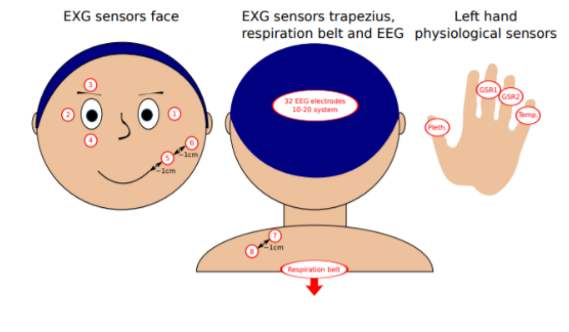

<p align="center"><b> Figura 2.</b>  Ejemplo de la base de datos DEAP.</p>

### **Marco teórico**



Para la toma de muestras del proyecto de la base de datos DEAP se contó con una población con un total de 32 participantes en el experimento. Cada uno de estos individuos visualizó 40 videos, cada uno de un minuto de duración, con el objetivo de identificar las emociones o sensaciones que estos videos les generaban.

Durante la ejecución del experimento, se utilizaron 40 canales equipados con diferentes sensores o electrodos para monitorear las respuestas de los participantes de la siguiente manera:

![Figura 3. Ejemplo de la base de datos DEAP](https://github.com/DavidELP17/TS3_MiniProyecto1/assets/17619940/ce5004e5-296d-400a-b948-c6af9eca62fa)
<p align="center"><b> Figura 3.</b>  Ejemplo de toma de muestras de la base de datos DEAP.</p>

Canales del 1 al 32 se destinaron para medir **señales electroencefalográficas (EEG)**, lo que nos permitió detectar la actividad eléctrica en sus cerebros.

Los canales 33 y 34 se emplearon para mediciones **electro-oculográficas (EOG)** con el propósito de rastrear los movimientos oculares, uno para los movimientos verticales y otro para los movimientos horizontales.

Los canales 35 y 36 se utilizaron para captar señales de **electromiogramas (EMG)**, lo que nos permitió identificar los movimientos de los músculos trapecio (ubicados en la espalda) y zigomático (debajo del ojo).

El canal 37 se reservó para medir la **"respuesta galvánica de la piel" (GSR)**, es decir, las variaciones en las propiedades eléctricas de la piel, como la conductancia, en respuesta a la sudoración.

El canal 38 se empleó para monitorear la **frecuencia respiratoria** mediante un cinturón o banda.

El canal 39 se utilizó para medir **cambios de volumen corporal a través del flujo sanguíneo** y para registrar el ritmo cardíaco mediante el uso de un pletismógrafo.

Por último, el canal 40 se utilizó para medir la **temperatura de la piel**.
El propósito de este experimento ya realizado fue realizar la clasificación de las diferentes emociones inducidas por los videos en cada uno de los participantes, utilizando criterios de "arousal" (excitación) y "valencia", con el fin de categorizar las respuestas en las siguientes emociones: Neutral, positivismo, tranquilidad, negativismo, sorpresa, satisfacción, tristeza, estrés.

### **Desarrollo de la actividad**



La Base de Datos DEAP representa un recurso multimodal diseñado para el análisis de los estados emocionales en seres humanos. En este proyecto, se capturaron datos de 32 participantes, incluyendo registros de electroencefalograma (EEG) y señales fisiológicas periféricas, mientras cada uno de ellos visualizaba 40 extractos de videos musicales con una duración de un minuto cada uno. Los participantes evaluaron cada video en términos de excitación (arousal), valencia, preferencia, dominio y familiaridad. Además, en el caso de 22 de los 32 participantes, se grabó un video frontal.

In [41]:
# Importar librerías
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [42]:
# Descarga de los sets de datos

#https://drive.google.com/file/d/1A7h9ir9gatSn4WNWr2JQUPCKGOai-ZKb/view?usp=sharing
!gdown '1A7h9ir9gatSn4WNWr2JQUPCKGOai-ZKb'

#https://drive.google.com/file/d/1-1_CXdtbZDMxo4x7lDM4w3Ecqu-6PAa8/view?usp=sharing
!gdown '1-1_CXdtbZDMxo4x7lDM4w3Ecqu-6PAa8'

#https://drive.google.com/file/d/12ffKvlfh4JQqXDxVISiPHoGM88nEokcS/view?usp=sharing
!gdown '12ffKvlfh4JQqXDxVISiPHoGM88nEokcS'

#https://drive.google.com/file/d/1jFQPbGLw3N9HwxLaJt8EEC5EuAR66TVJ/view?usp=sharing
!gdown '1jFQPbGLw3N9HwxLaJt8EEC5EuAR66TVJ'

Downloading...
From: https://drive.google.com/uc?id=1A7h9ir9gatSn4WNWr2JQUPCKGOai-ZKb
To: /content/s14.mat
100% 80.6M/80.6M [00:00<00:00, 223MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1_CXdtbZDMxo4x7lDM4w3Ecqu-6PAa8
To: /content/s17.mat
100% 80.7M/80.7M [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=12ffKvlfh4JQqXDxVISiPHoGM88nEokcS
To: /content/s16.mat
100% 80.8M/80.8M [00:00<00:00, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jFQPbGLw3N9HwxLaJt8EEC5EuAR66TVJ
To: /content/s15.mat
100% 80.7M/80.7M [00:00<00:00, 251MB/s]


In [43]:
datosP1 = sc.loadmat('s14.mat')
datosP2 = sc.loadmat('s15.mat')
datosP3 = sc.loadmat('s16.mat')
datosP4 = sc.loadmat('s17.mat')

In [44]:
signals1   = datosP1['data']
etiquetas1 = datosP1['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

signals2   = datosP2['data']
etiquetas2 = datosP2['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

signals3   = datosP3['data']
etiquetas3 = datosP3['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

signals4   = datosP4['data']
etiquetas4 = datosP4['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

In [45]:
print(signals1.shape)
print(signals2.shape)
print(signals3.shape)
print(signals4.shape)

(40, 40, 6528)
(40, 40, 6528)
(40, 40, 6528)
(40, 40, 6528)



Cada conjunto de datos, que corresponde a la representación de cada sujeto, seguirá un formato de (40, 40, 6528). Esto significa que cada conjunto consta de tres componentes principales que representan, respectivamente:

- Las 40 respuestas emocionales generadas por la visualización de los 40 videos.
- Las 40 señales fisiológicas medidas durante el experimento.
- Los datos recopilados durante la ejecución del experimento, con los primeros 3 segundos eliminados, ya que corresponden al período de acondicionamiento de los participantes.

### **Descripción del set de datos**

Para realizar la caracterización de las señales obtenidas de la base de datos (EEG, EOG, EMG, GSR, frecuencia respiratoria, flujo sanguíneo y temperatura), se seleccionarán tres características distintas para cada tipo de señal. A continuación, se detalla cómo se abordará cada tipo de señal:






**EEG (Electroencefalograma):**
Se conceptualizarán las distintas bandas espectrales presentes en las EEG, considerando su importancia en la identificación de patrones emocionales:

- ***Banda Delta (hasta 3,5 Hz):*** Se asocia con el sueño profundo y situaciones de alta presión intracraneal.
- ***Banda Theta (3,5 a 7,5 Hz):*** Relacionada con la maduración cerebral y patrones anormales en adultos despiertos.
- ***Banda Alfa (7,5 a 12,5 Hz):*** Ligada a estados de relajación, desaparece con la apertura de los ojos.
- ***Banda Beta (12,5 a 30 Hz):*** Común en adultos y asociada a actividad mental activa.
- ***Banda Gamma (30 a 50 Hz):*** Relacionada con la percepción de detalles.
Las características a considerar para caracterizar la actividad cerebral incluirán la Densidad Espectral de Potencia (DEP) de estas bandas en pares de electrodos correspondientes.

***Imagen representativa de la posición de las señales electroencefalográficas***

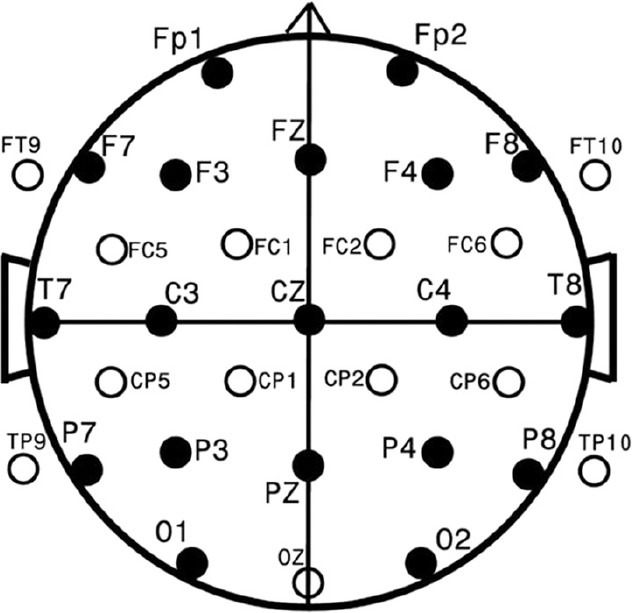

<p align="center"><b> Figura 4.</b>  Áreas de toma de muestras encefalográficas.</p>

**EOG (Electro-oculografía):**
Para las señales de movimientos oculares (verticales y horizontales), se tendrán en cuenta las siguientes características:

- Media y Varianza.
- Energía.
- Frecuencia de parpadeo de los ojos.

**EMG (Electromiograma):**
Con el objetivo de caracterizar los movimientos de los músculos trapecio y zigomático, se analizarán las siguientes características:

- Media.
- Varianza.
- Energía.

**GSR (Respuesta Galvánica de la Piel):**
Para medir las variaciones en las propiedades eléctricas de la piel, se considerarán las siguientes características:

- Resistencia promedio de la piel.
- Promedio de las derivadas.
- Promedio de las derivadas únicamente para valores negativos.
- Número de mínimos locales.

**Patrón de Respiración:**
En cuanto a la señal que mide la frecuencia respiratoria, se extraerán las siguientes características:

- Señal de respiración promedio.
- Variación de la respiración (promedio de sus derivadas).
- Ritmo respiratorio (centroide espectral).
- Frecuencia respiratoria.
- 10 potencias espectrales en la banda de 0 a 2,4 Hz.

**Presión Sanguínea (Volumen de Flujo Sanguíneo):**
Utilizando el pletismógrafo para medir el flujo sanguíneo, se obtendrán las siguientes características:

- Valor promedio y desviación estándar del ritmo cardíaco.
- Intervalos entre latidos.
- Densidad Espectral de Potencia (DEP) en diferentes bandas de frecuencia.

**Temperatura de la Piel:**
Para medir la señal de temperatura de la piel, se calcularán las siguientes características:

- Valor promedio.
- Valor promedio de sus derivadas.
- Potencia espectral en las bandas de 0 a 0,1 Hz y de 0,1 a 0,2 Hz.

Finalmente, todas estas características se combinarán en una tabla junto con las etiquetas emocionales correspondientes, basadas en los niveles de excitación y valencia, para llevar a cabo un análisis completo de los datos recopilados.

In [46]:
fs = 128 #En la descripción de los datos se informa que la frecuencia de muestreo es de 128 Hz

In [47]:
# Función para graficar las 40 señales en subplots de 8x5
def graficar_señales(canal, fuente):
    canal = canal - 1  # Restamos 1 al canal ya que la primera ubicación es igual a 0

    fig, axs = plt.subplots(8, 5, figsize=(15, 20))  # Crear una figura con subplots de 8 filas y 5 columnas

    for video in range(40):  # Ciclo que recorre todos los videos
        fila = video // 5  # Calcular la fila del subplot
        columna = video % 5  # Calcular la columna del subplot

        señal = fuente[video, canal, :]  # Variable de la señal escogida
        ts = len(señal) / 128.  # Tiempo de muestreo
        tiempo = np.linspace(0, ts, len(señal))  # Tiempo

        axs[fila, columna].plot(tiempo, señal)
        axs[fila, columna].set_title('Video ' + str(video + 1) + ' Canal ' + str(canal + 1))
        axs[fila, columna].set_ylabel('uV')
        axs[fila, columna].set_xlabel('s')
        axs[fila, columna].grid()

    plt.tight_layout()  # Ajustar el diseño de los subplots
    plt.show()

In [72]:
# Función para graficar dos canales en subplots de 5x8
def graficar_señales2(canal1, canal2, label1, label2,fuente):
    canal1 = canal1 - 1  # Restamos 1 al canal1 ya que la primera ubicación es igual a 0
    canal2 = canal2 - 1  # Restamos 1 al canal2 ya que la primera ubicación es igual a 0

    fig, axs = plt.subplots(8, 5, figsize=(15, 20))  # Crear una figura con subplots de 8 filas y 5 columnas

    for video in range(40):  # Ciclo que recorre todos los videos
        fila = video // 5  # Calcular la fila del subplot
        columna = video % 5  # Calcular la columna del subplot

        señal_canal1 = fuente[video, canal1, :]  # Señal del canal 1
        señal_canal2 = fuente[video, canal2, :]  # Señal del canal 2
        ts = len(señal_canal1) / 128.  # Tiempo de muestreo
        tiempo = np.linspace(0, ts, len(señal_canal1))  # Tiempo

        axs[fila, columna].plot(tiempo, señal_canal1, label=label1)
        axs[fila, columna].plot(tiempo, señal_canal2, label=label2)
        axs[fila, columna].set_title('Video ' + str(video + 1))
        axs[fila, columna].set_ylabel('uV')
        axs[fila, columna].set_xlabel('s')
        axs[fila, columna].grid()
        axs[fila, columna].legend()

    plt.tight_layout()  # Ajustar el diseño de los subplots
    plt.show()

In [48]:
# Llama a la función para graficar los diferentes tipos de señales
canal_hEOG = 33
canal_vEOG = 34
canal_zEMG = 35
canal_tEMG = 36
canal_GSR = 37
canal_respiracion = 38
canal_plethysmograph = 39
canal_temperatura = 40

## **Graficamos para el sujeto 14**

### **EOG**

El electrooculograma (EOG) es un procedimiento médico en el que se colocan pequeños electrodos cerca de los músculos oculares para registrar y medir sus movimientos. Este examen se utiliza comúnmente en la polisomnografía, un estudio del sueño.

En condiciones normales, se observa una diferencia de potencial eléctrico de aproximadamente 0.4 a 5 milivoltios (mV) entre la córnea del ojo y una membrana llamada membrana de Bruch, que se encuentra en la parte posterior del ojo.

La raíz de esta diferencia de potencial se localiza en el epitelio pigmentario de la retina, y esto nos permite considerar la existencia de un dipolo eléctrico. Este dipolo puede representarse mediante un vector, cuyo extremo positivo coincide con la córnea y el extremo negativo con la retina, y su brazo se alinea con el eje anteroposterior del globo ocular.

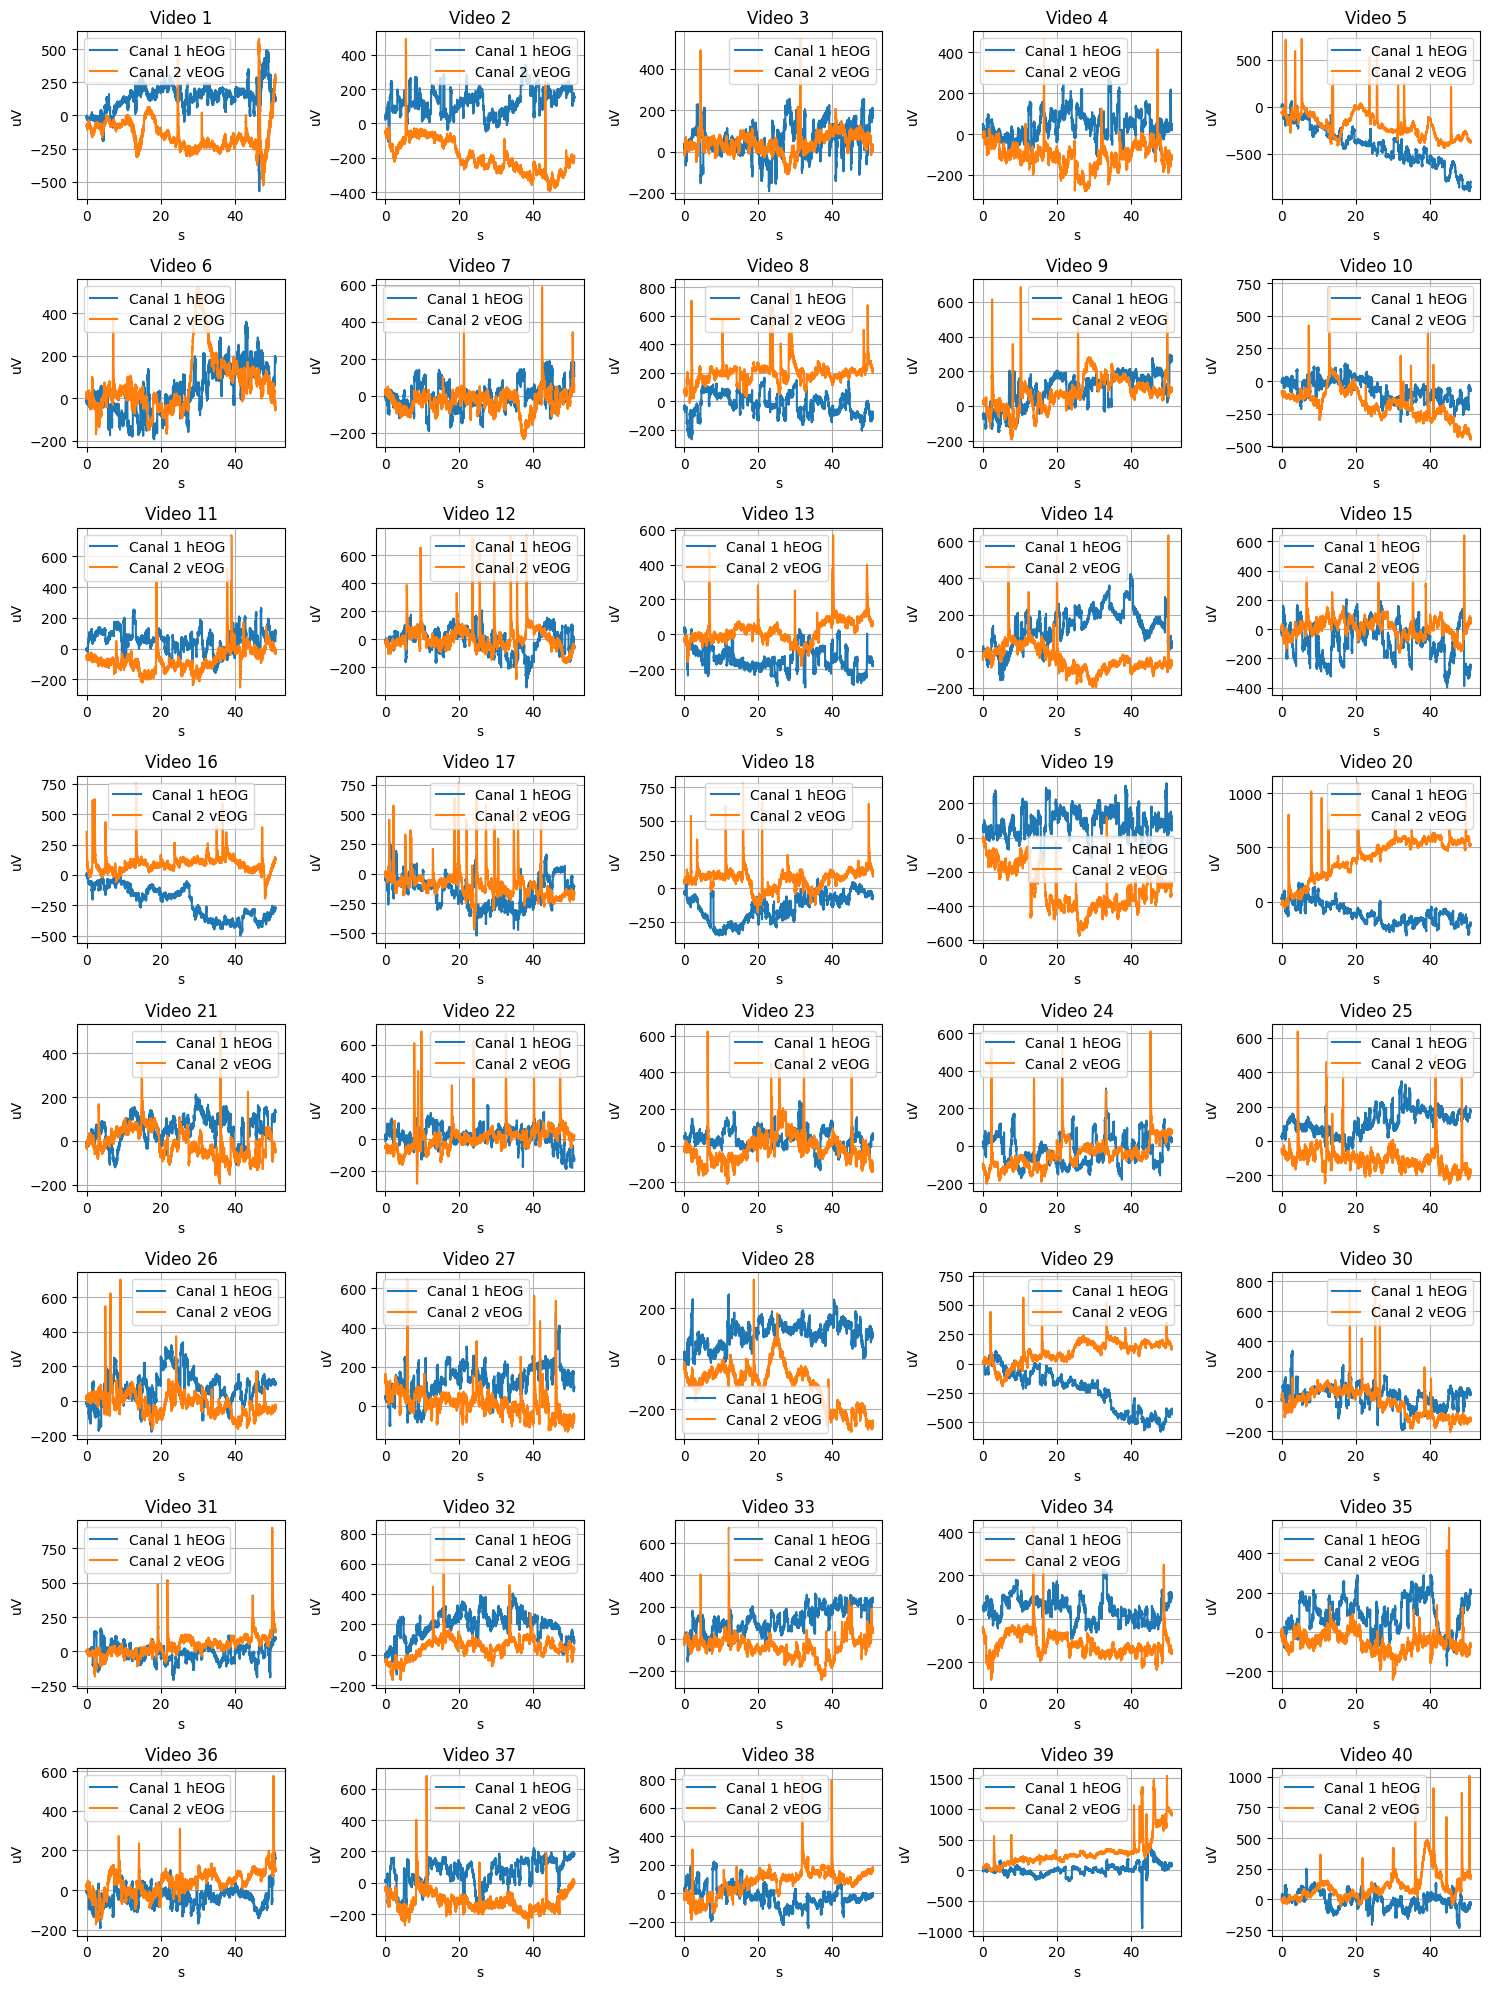

In [74]:
# Llama a la función para graficar los diferentes canales
graficar_señales2(canal_hEOG,canal_vEOG,'Canal 1 hEOG','Canal 2 vEOG',signals1)

### **EMG**

Las señales electromiográficas (EMG) son señales eléctricas generadas por un músculo cuando se contrae o se relaja. Esta propiedad muscular se busca aprovechar en la computación para desarrollar interfaces de comunicación entre el usuario y la máquina, ofreciendo alternativas a los dispositivos convencionales como el teclado y el ratón.

La señal EMG tiene dos canales, 35 y 36.

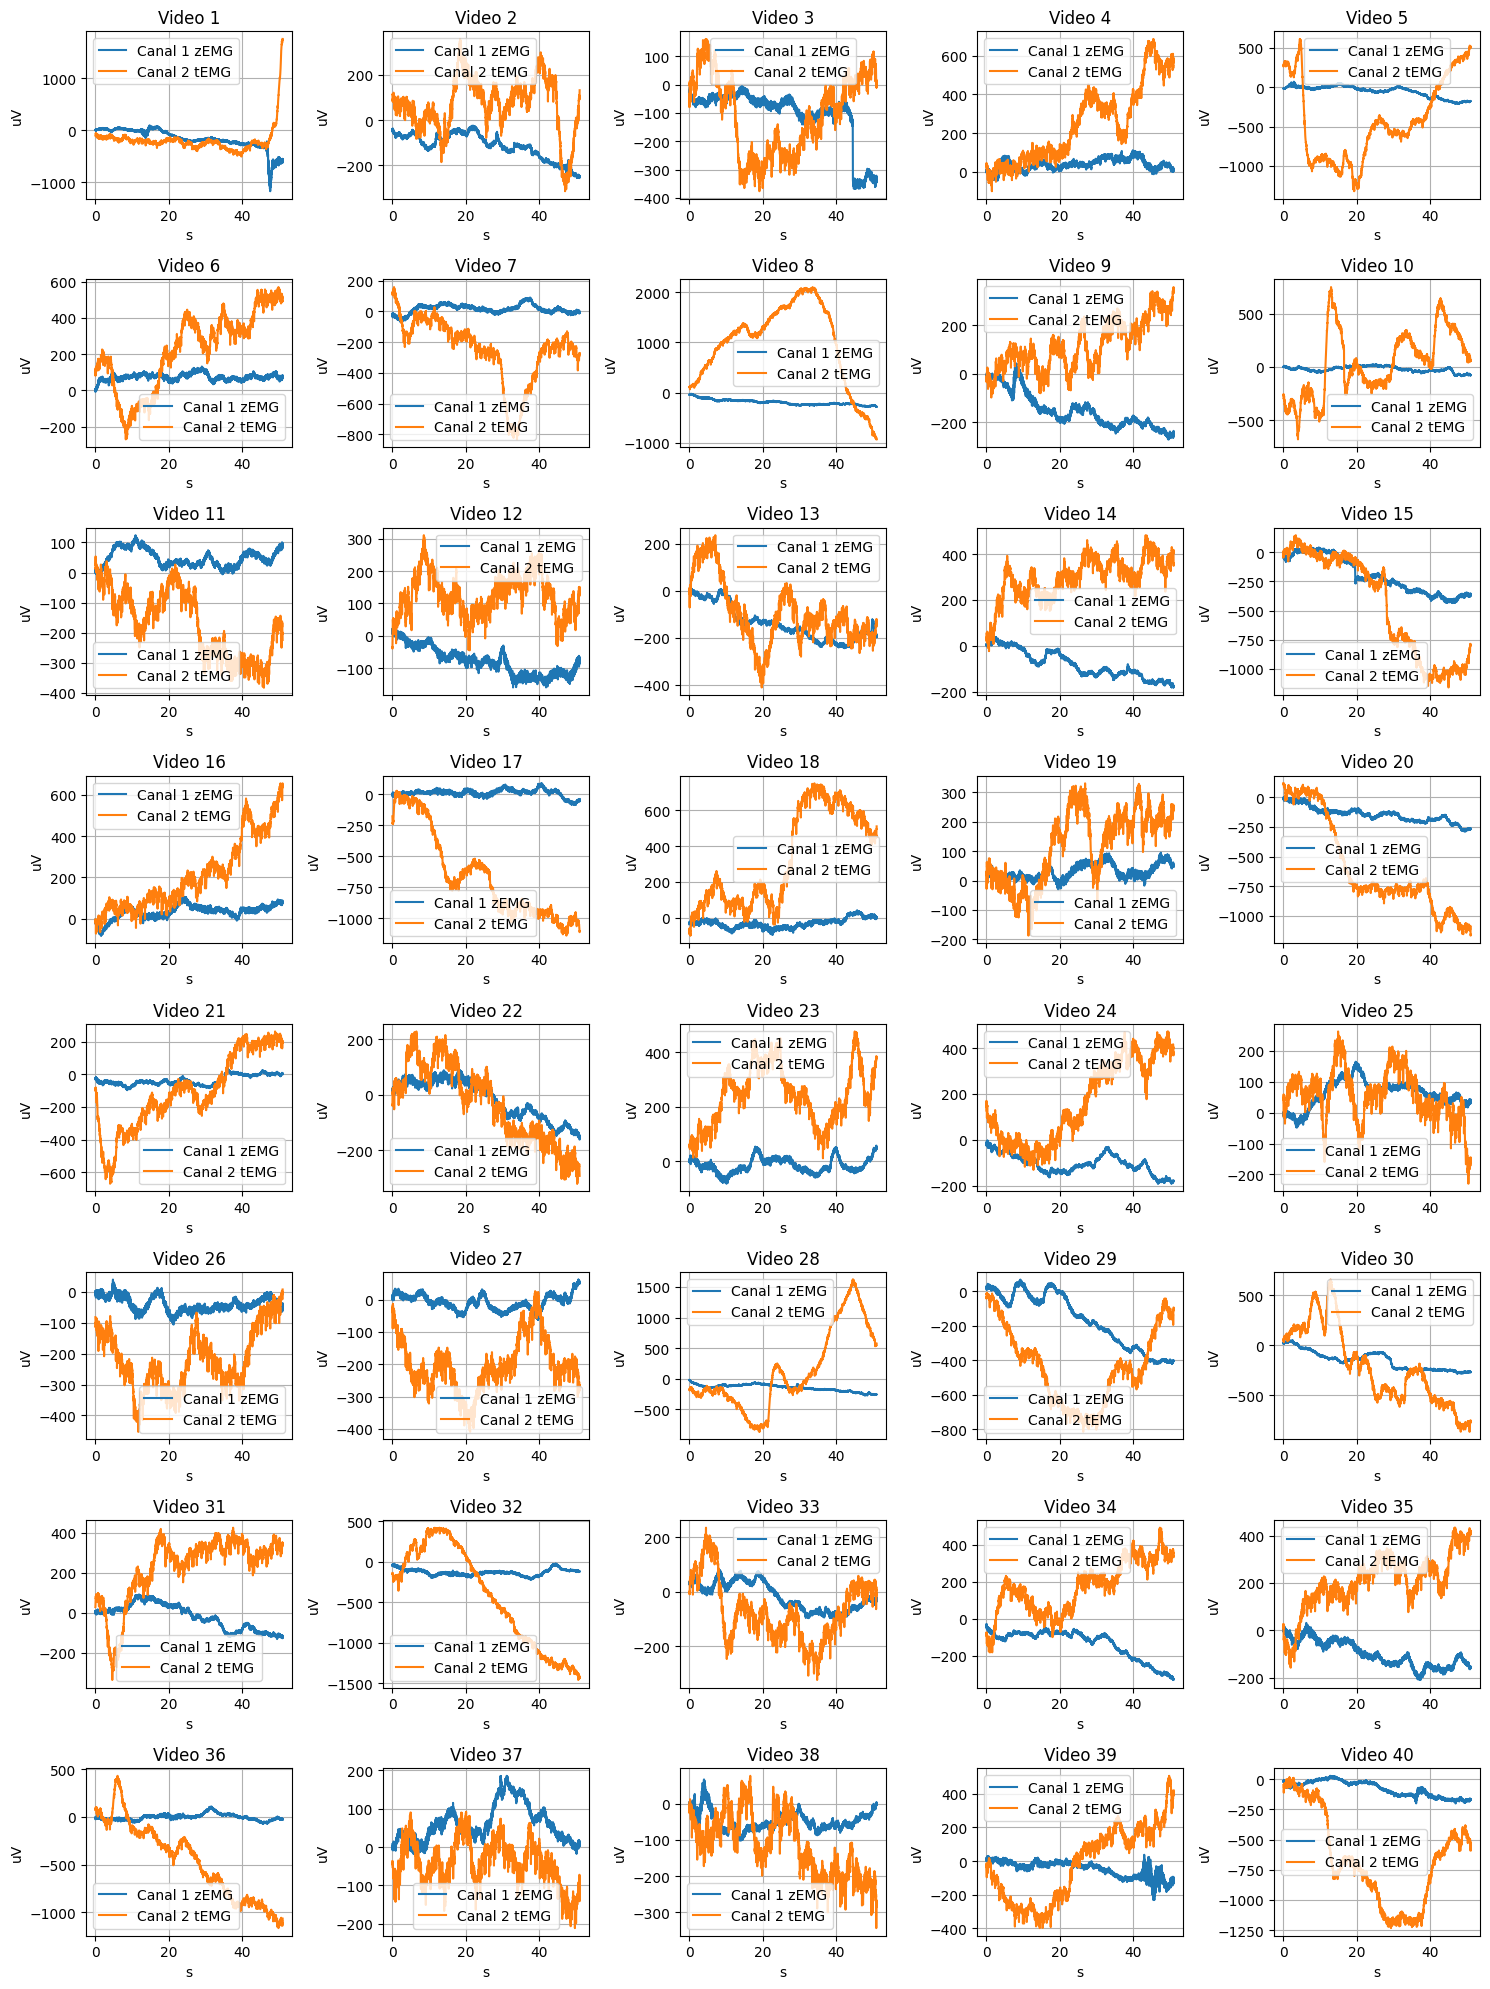

In [73]:
# Llama a la función para graficar los diferentes canales
graficar_señales2(canal_zEMG,canal_tEMG,'Canal 1 zEMG','Canal 2 tEMG',signals1)

### **GSR**

La respuesta galvánica de la piel (GSR), también conocida como actividad electrodérmica (EDA) y conductancia de la piel (SC), implica la medición de los cambios constantes en las propiedades eléctricas de la piel, como la conductancia, que se producen como resultado de las fluctuaciones en la sudoración del cuerpo humano.

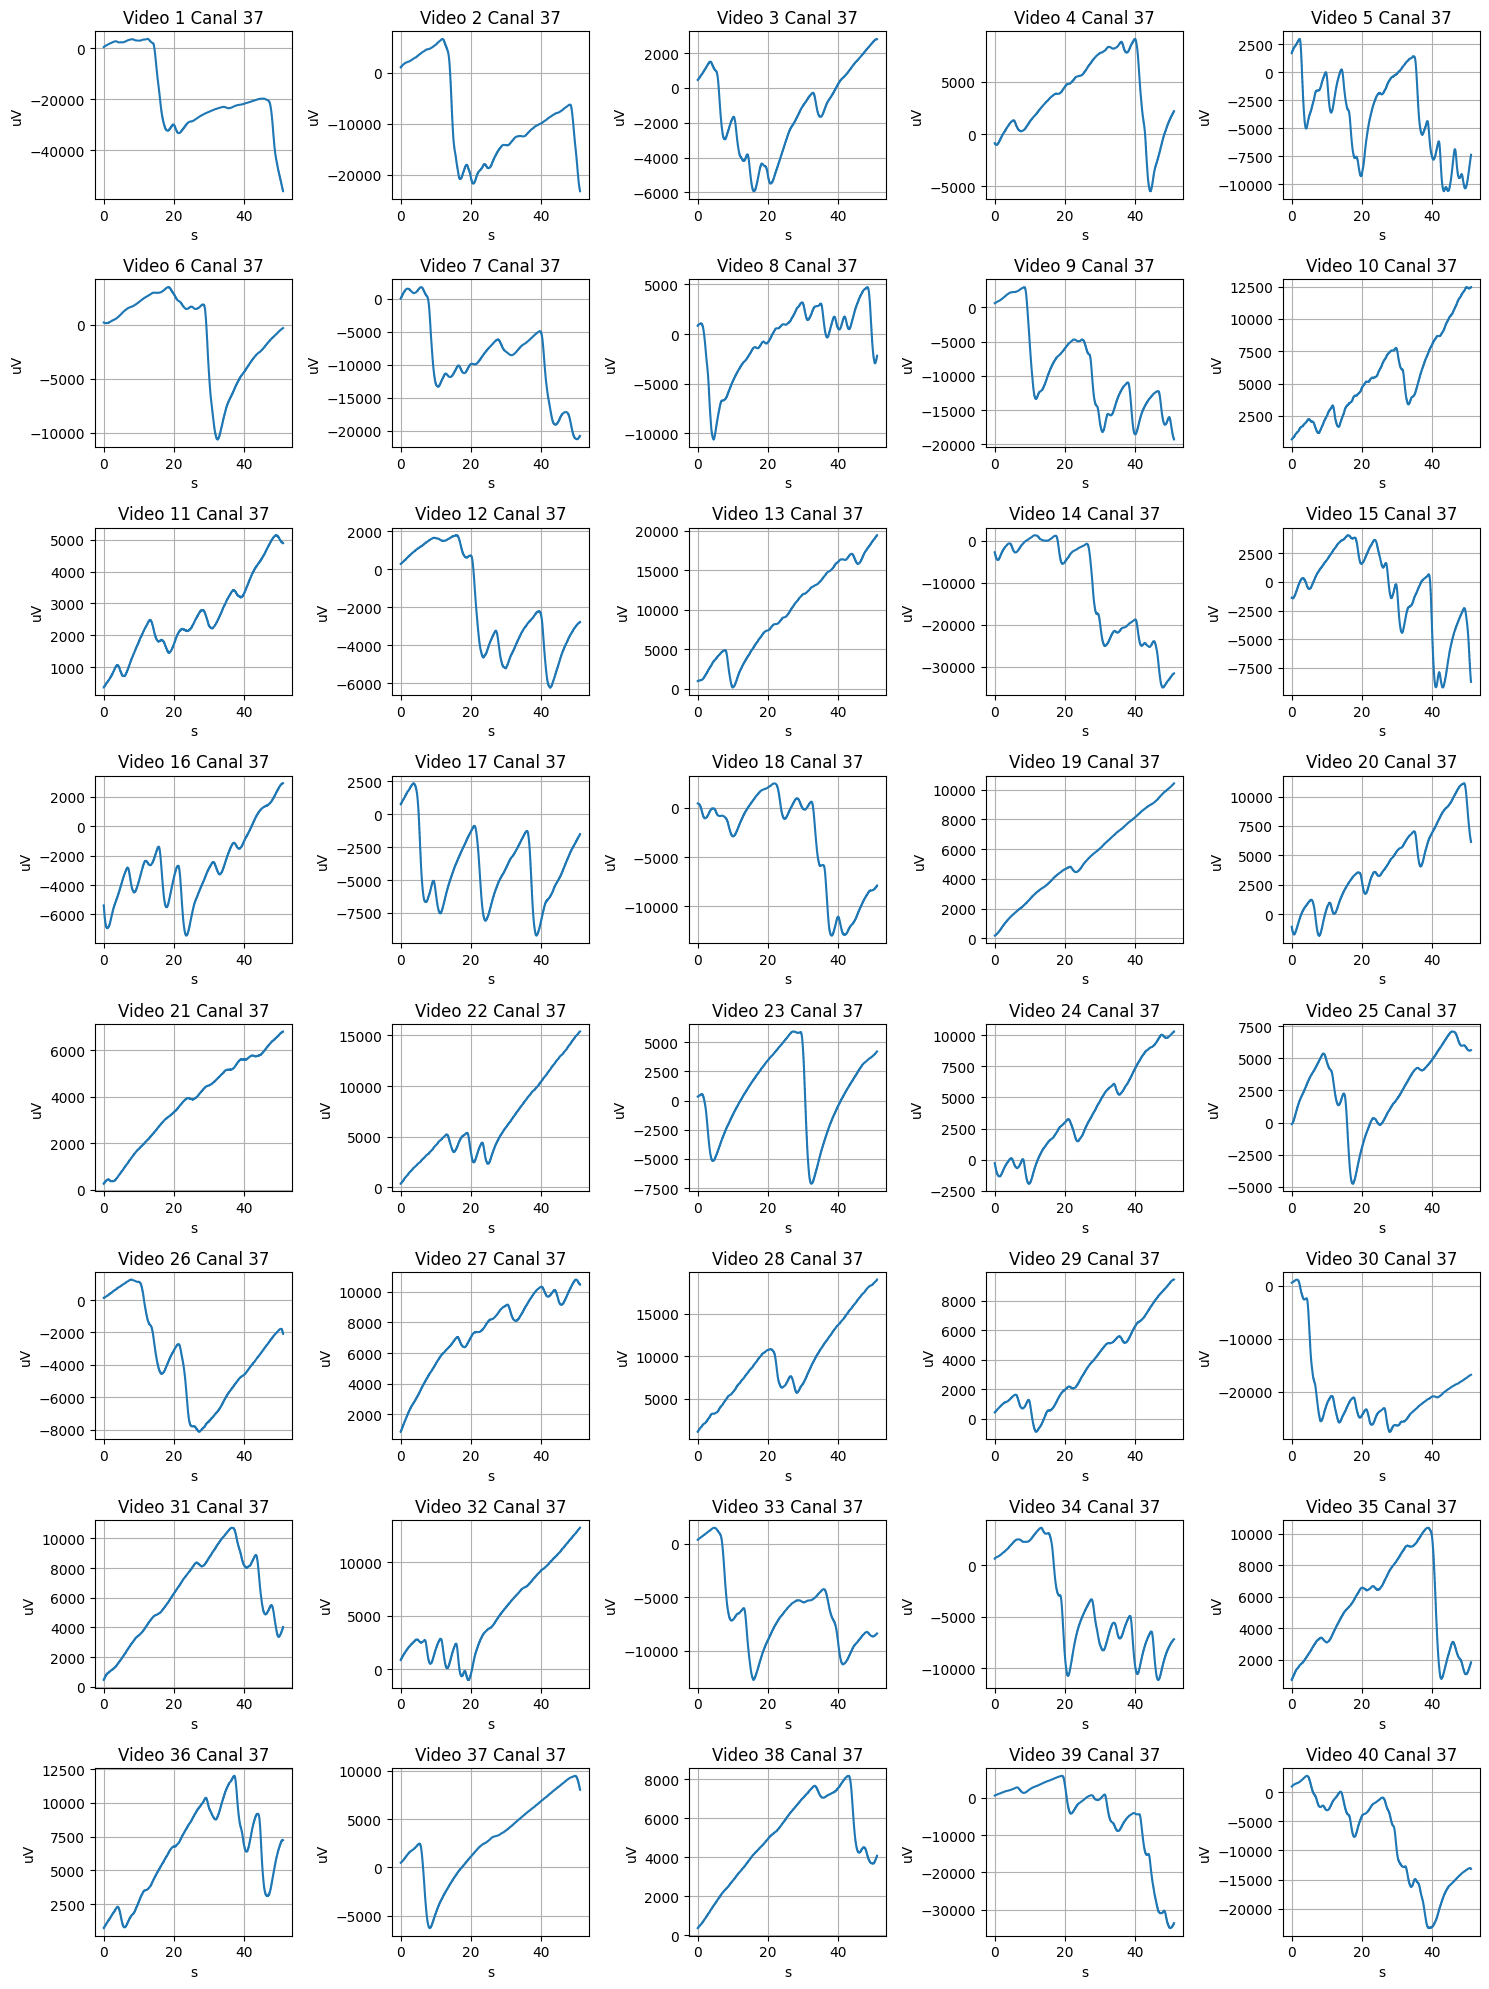

In [60]:
# Llama a la función para graficar los diferentes canales
graficar_señales(canal_GSR,signals1)

### **RESPIRATION PATTERN**

Los patrones de respiración hacen referencia a la frecuencia respiratoria, que se describe como la cantidad de respiraciones que ocurren en un intervalo de tiempo determinado, además de considerar la cantidad de aire que se inhala y exhala en cada ciclo respiratorio (volumen tidal). Estos patrones de respiración desempeñan un papel fundamental en el diagnóstico de diversas enfermedades, algunas de las cuales no se limitan únicamente al sistema respiratorio, ya que afectan otros sistemas del cuerpo.

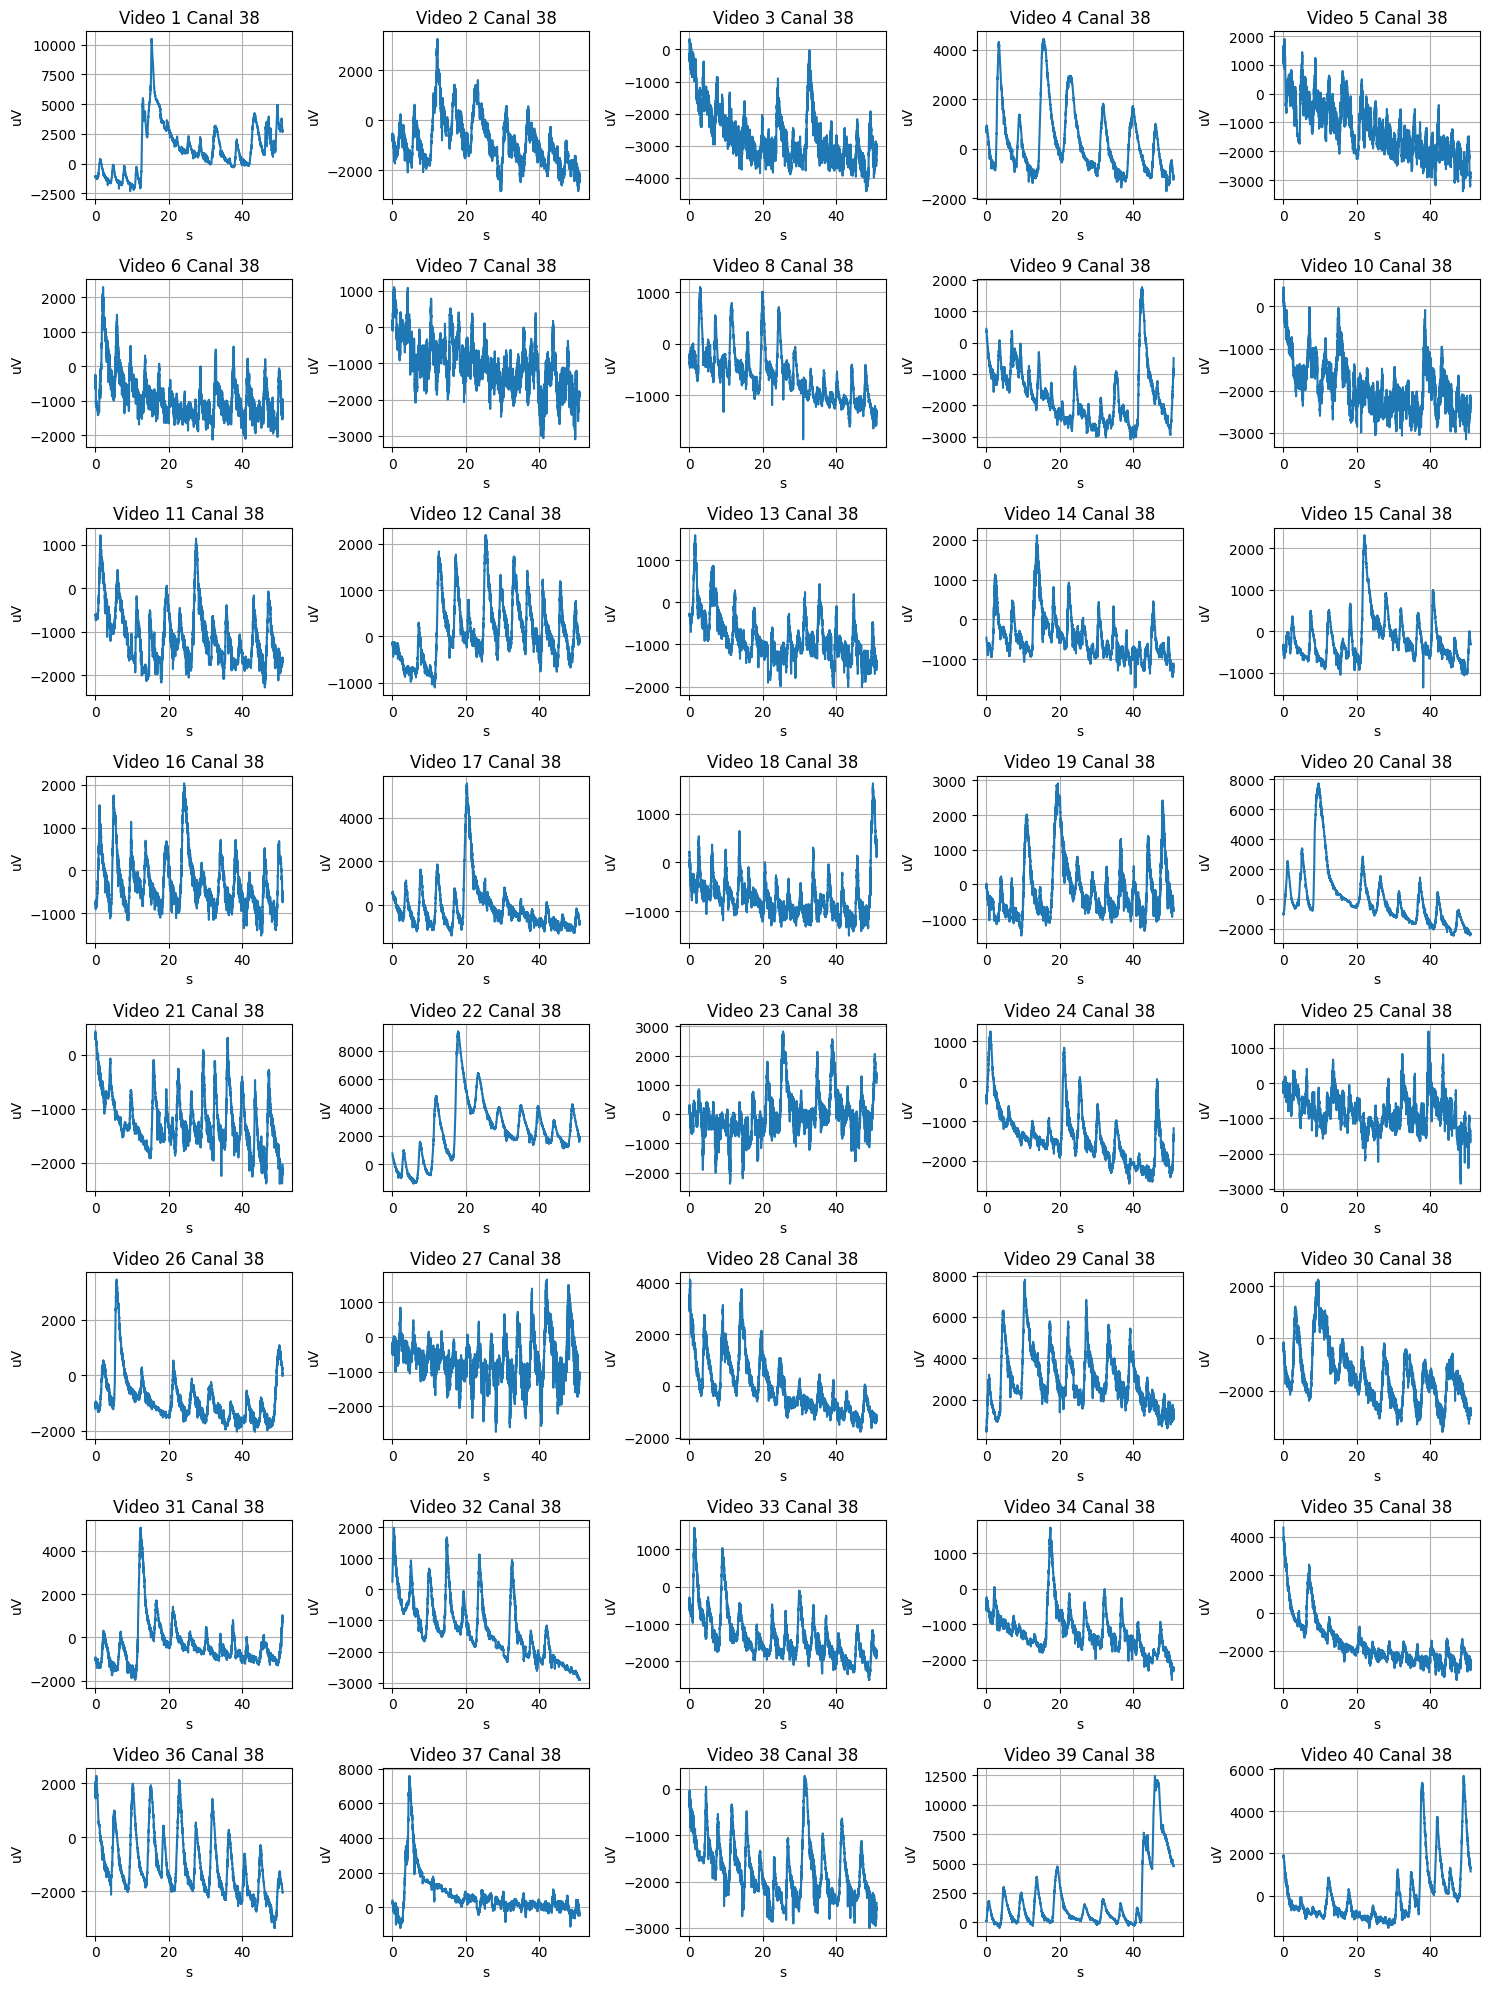

In [59]:
# Llama a la función para graficar los diferentes canales
graficar_señales(canal_respiracion,signals1)

### **BLOOD VOLUME PRESSURE**

La pletismografía comprende métodos que registran modificaciones en el volumen debido a alteraciones en el flujo sanguíneo. Estos métodos no se enfocan exclusivamente en un vaso arterial particular, sino que detectan cambios de volumen en un tramo de la extremidad.

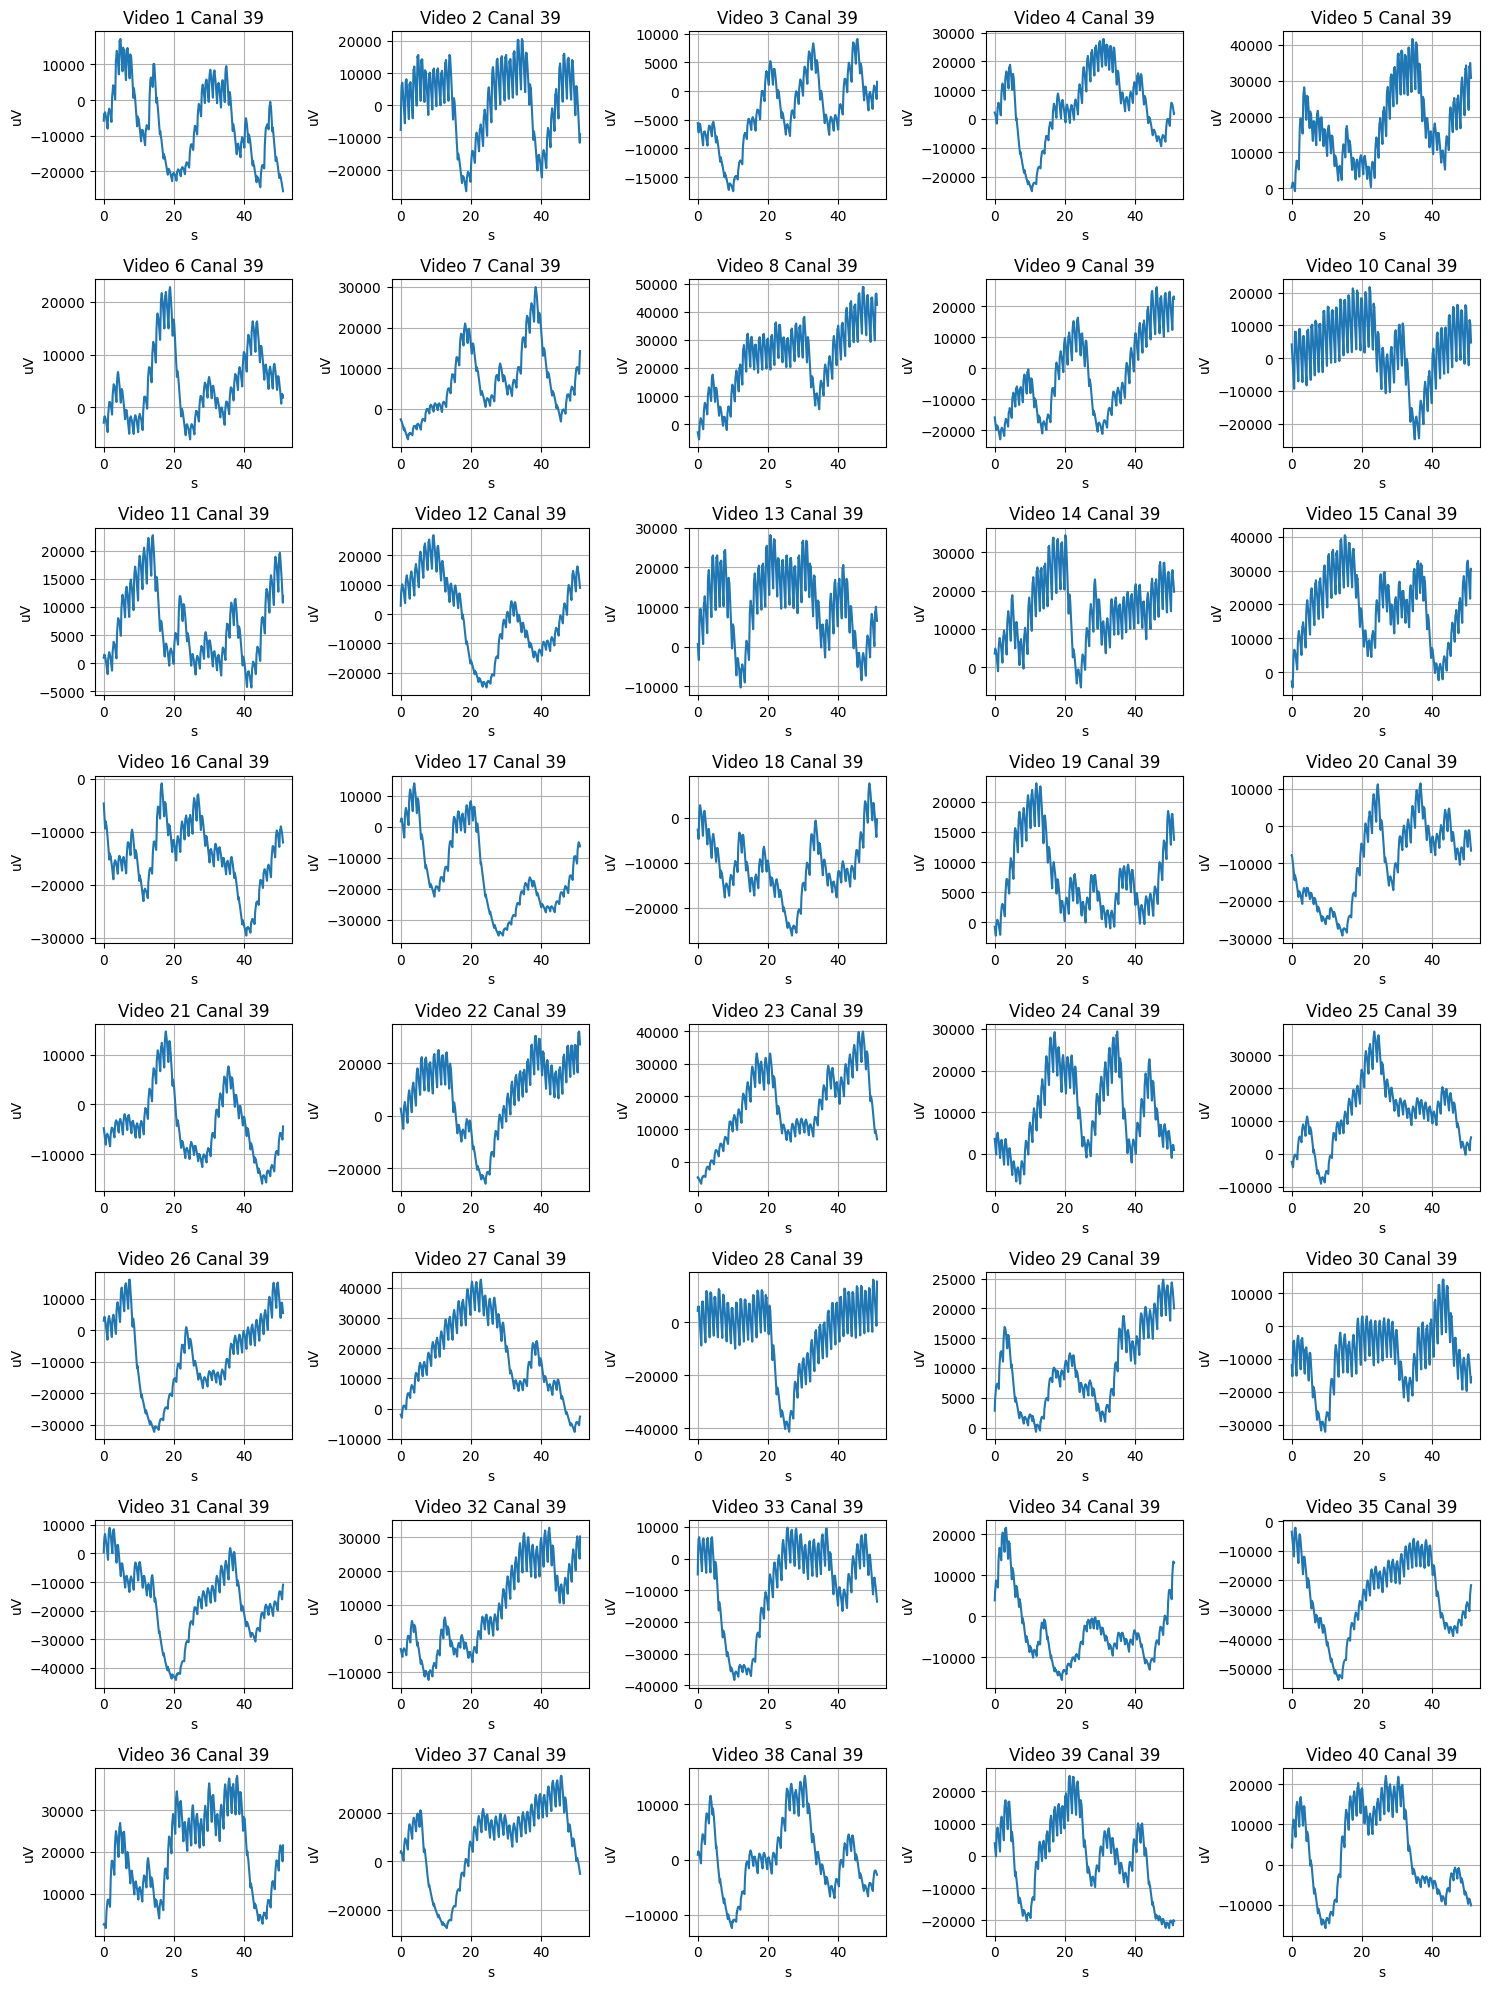

In [61]:
# Llama a la función para graficar los diferentes canales
graficar_señales(canal_plethysmograph,signals1)

### **SKIN TEMPERATURE**

Las emociones orquestan nuestras acciones y respuestas fisiológicas en situaciones significativas para la supervivencia y experiencias gratificantes. Aunque en muchas ocasiones somos conscientes de nuestras emociones presentes, como la ira o la felicidad, los procesos subyacentes que generan estas sensaciones subjetivas aún se mantienen en gran parte sin resolver.

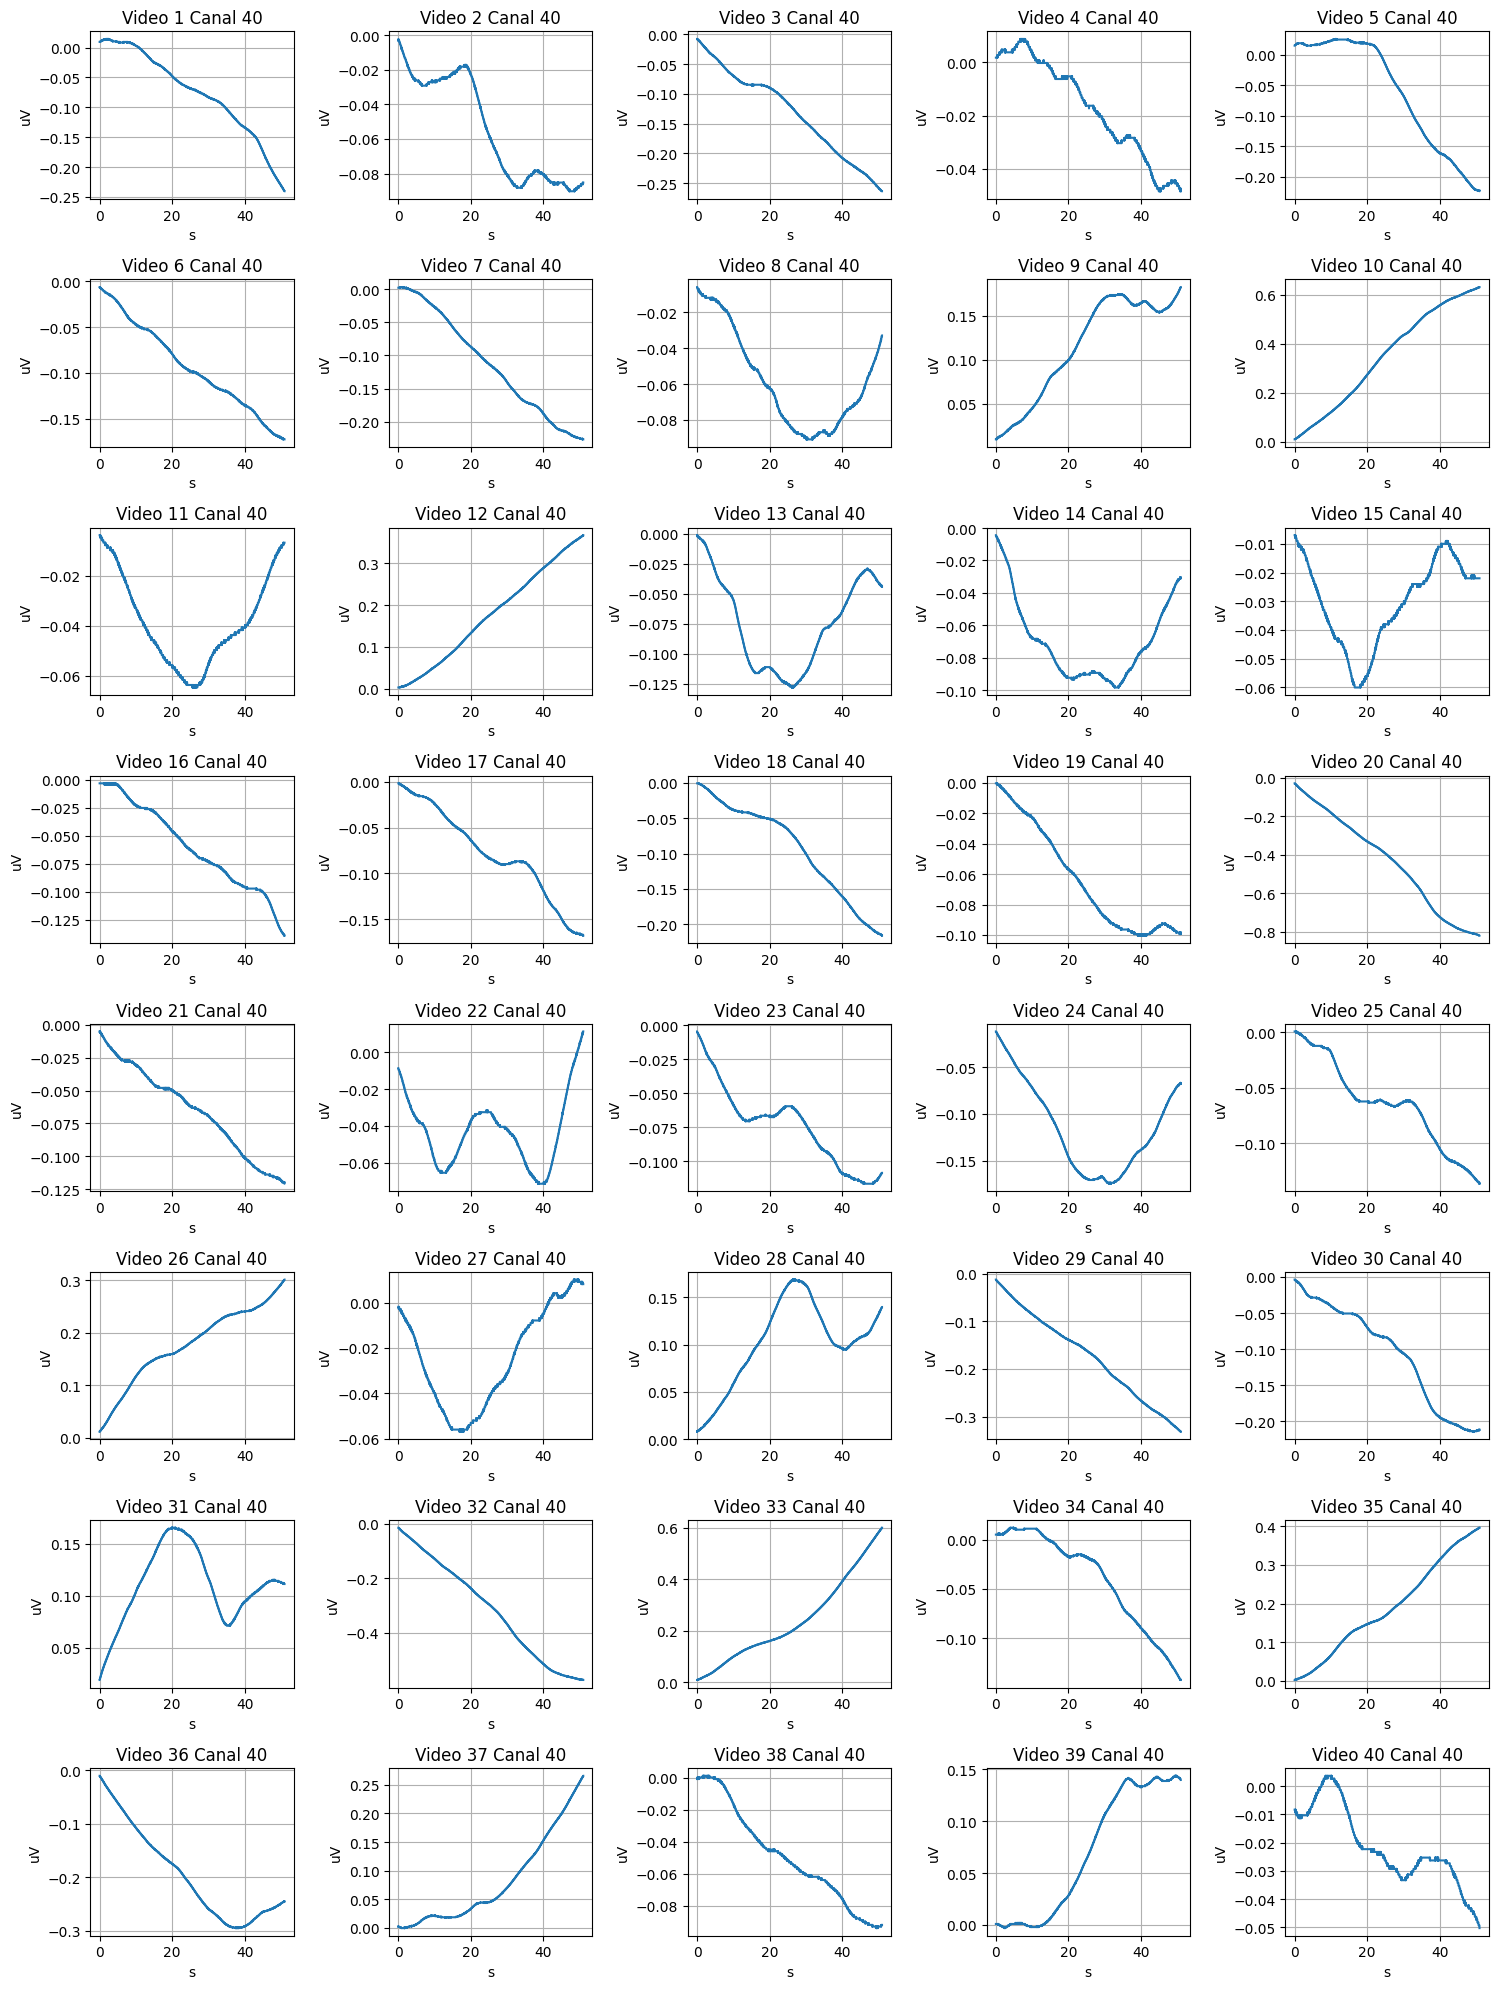

In [75]:
# Llama a la función para graficar los diferentes canales
graficar_señales(canal_temperatura,signals1)

Cada Conjunto de características procesado será un vector de ${\bf{x}}\in\mathbb{R}^{D\times 1}$

Se construirá una matriz de características ${\bf{X}}\in\mathbb{R}^{N\times D}$ donde ${\bf{X}} = \{{\bf{x}}_n\}_{n=1}^{N}$

La siguiente tabla muestra el diseño de canales y el preprocesamiento realizado:

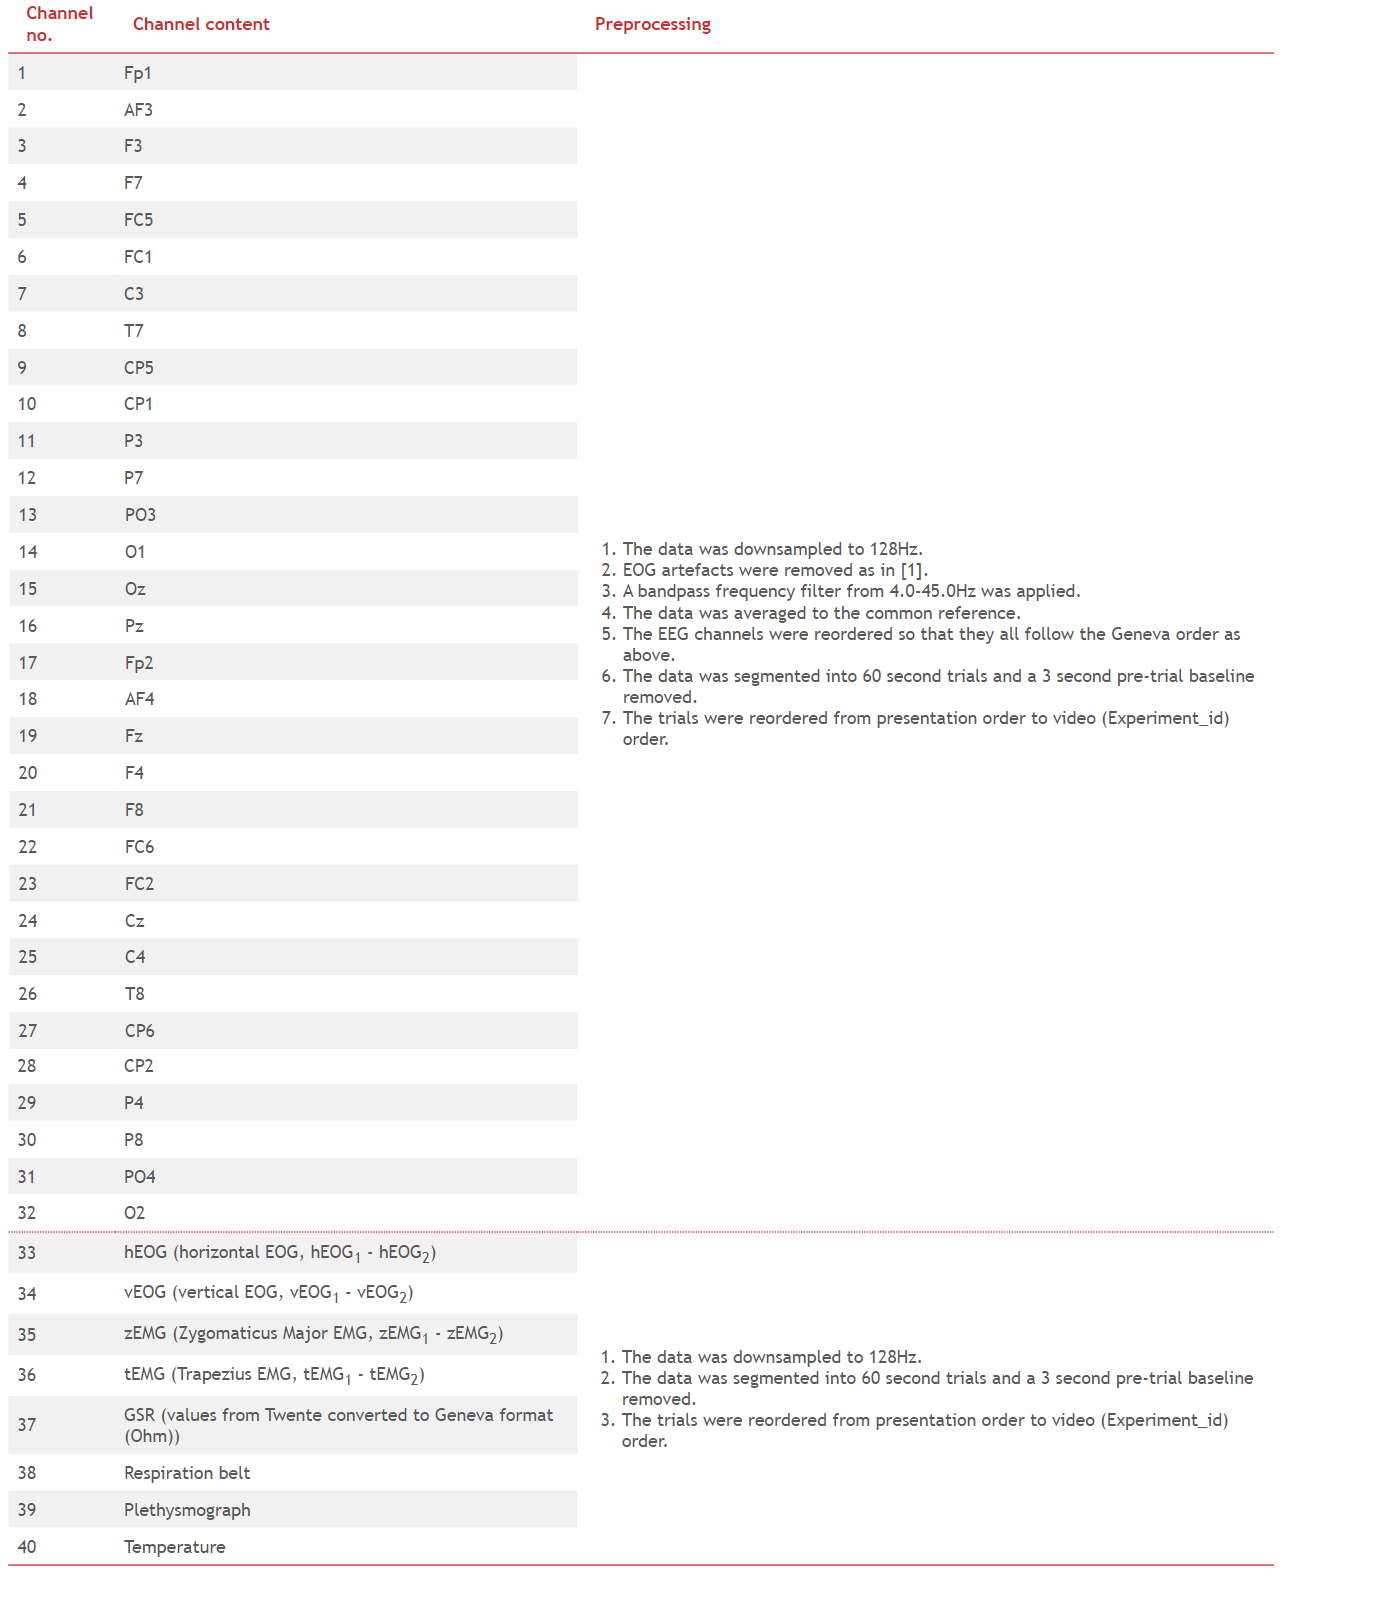

## Espacios Arousal - Valence

Cada uno de los 40 videos induce una emoción en los participantes, y como resultado, se les asigna una etiqueta correspondiente. Estas etiquetas se determinan considerando los modelos dimensionales de las emociones, los cuales sugieren que se comprenden mejor cuando se ubican en un espacio dimensional. Este espacio suele ser bidimensional y abarca dos aspectos principales: valencia y excitación. La valencia emocional se utiliza para describir el grado de positividad o negatividad de una emoción, mientras que la excitación se refiere a la intensidad, es decir, a la fuerza del estado emocional experimentado.

- **Excitación (arousal)**: El nivel de activación fisiológica o excitación experimentado en respuesta a un estímulo, que va desde bajo (tranquilo) hasta alto (intenso).

- **Valencia (valence)**: La cualidad emocional o positividad/negatividad de la experiencia subjetiva de un individuo, que va desde negativa (desagradable) hasta positiva (agradable).

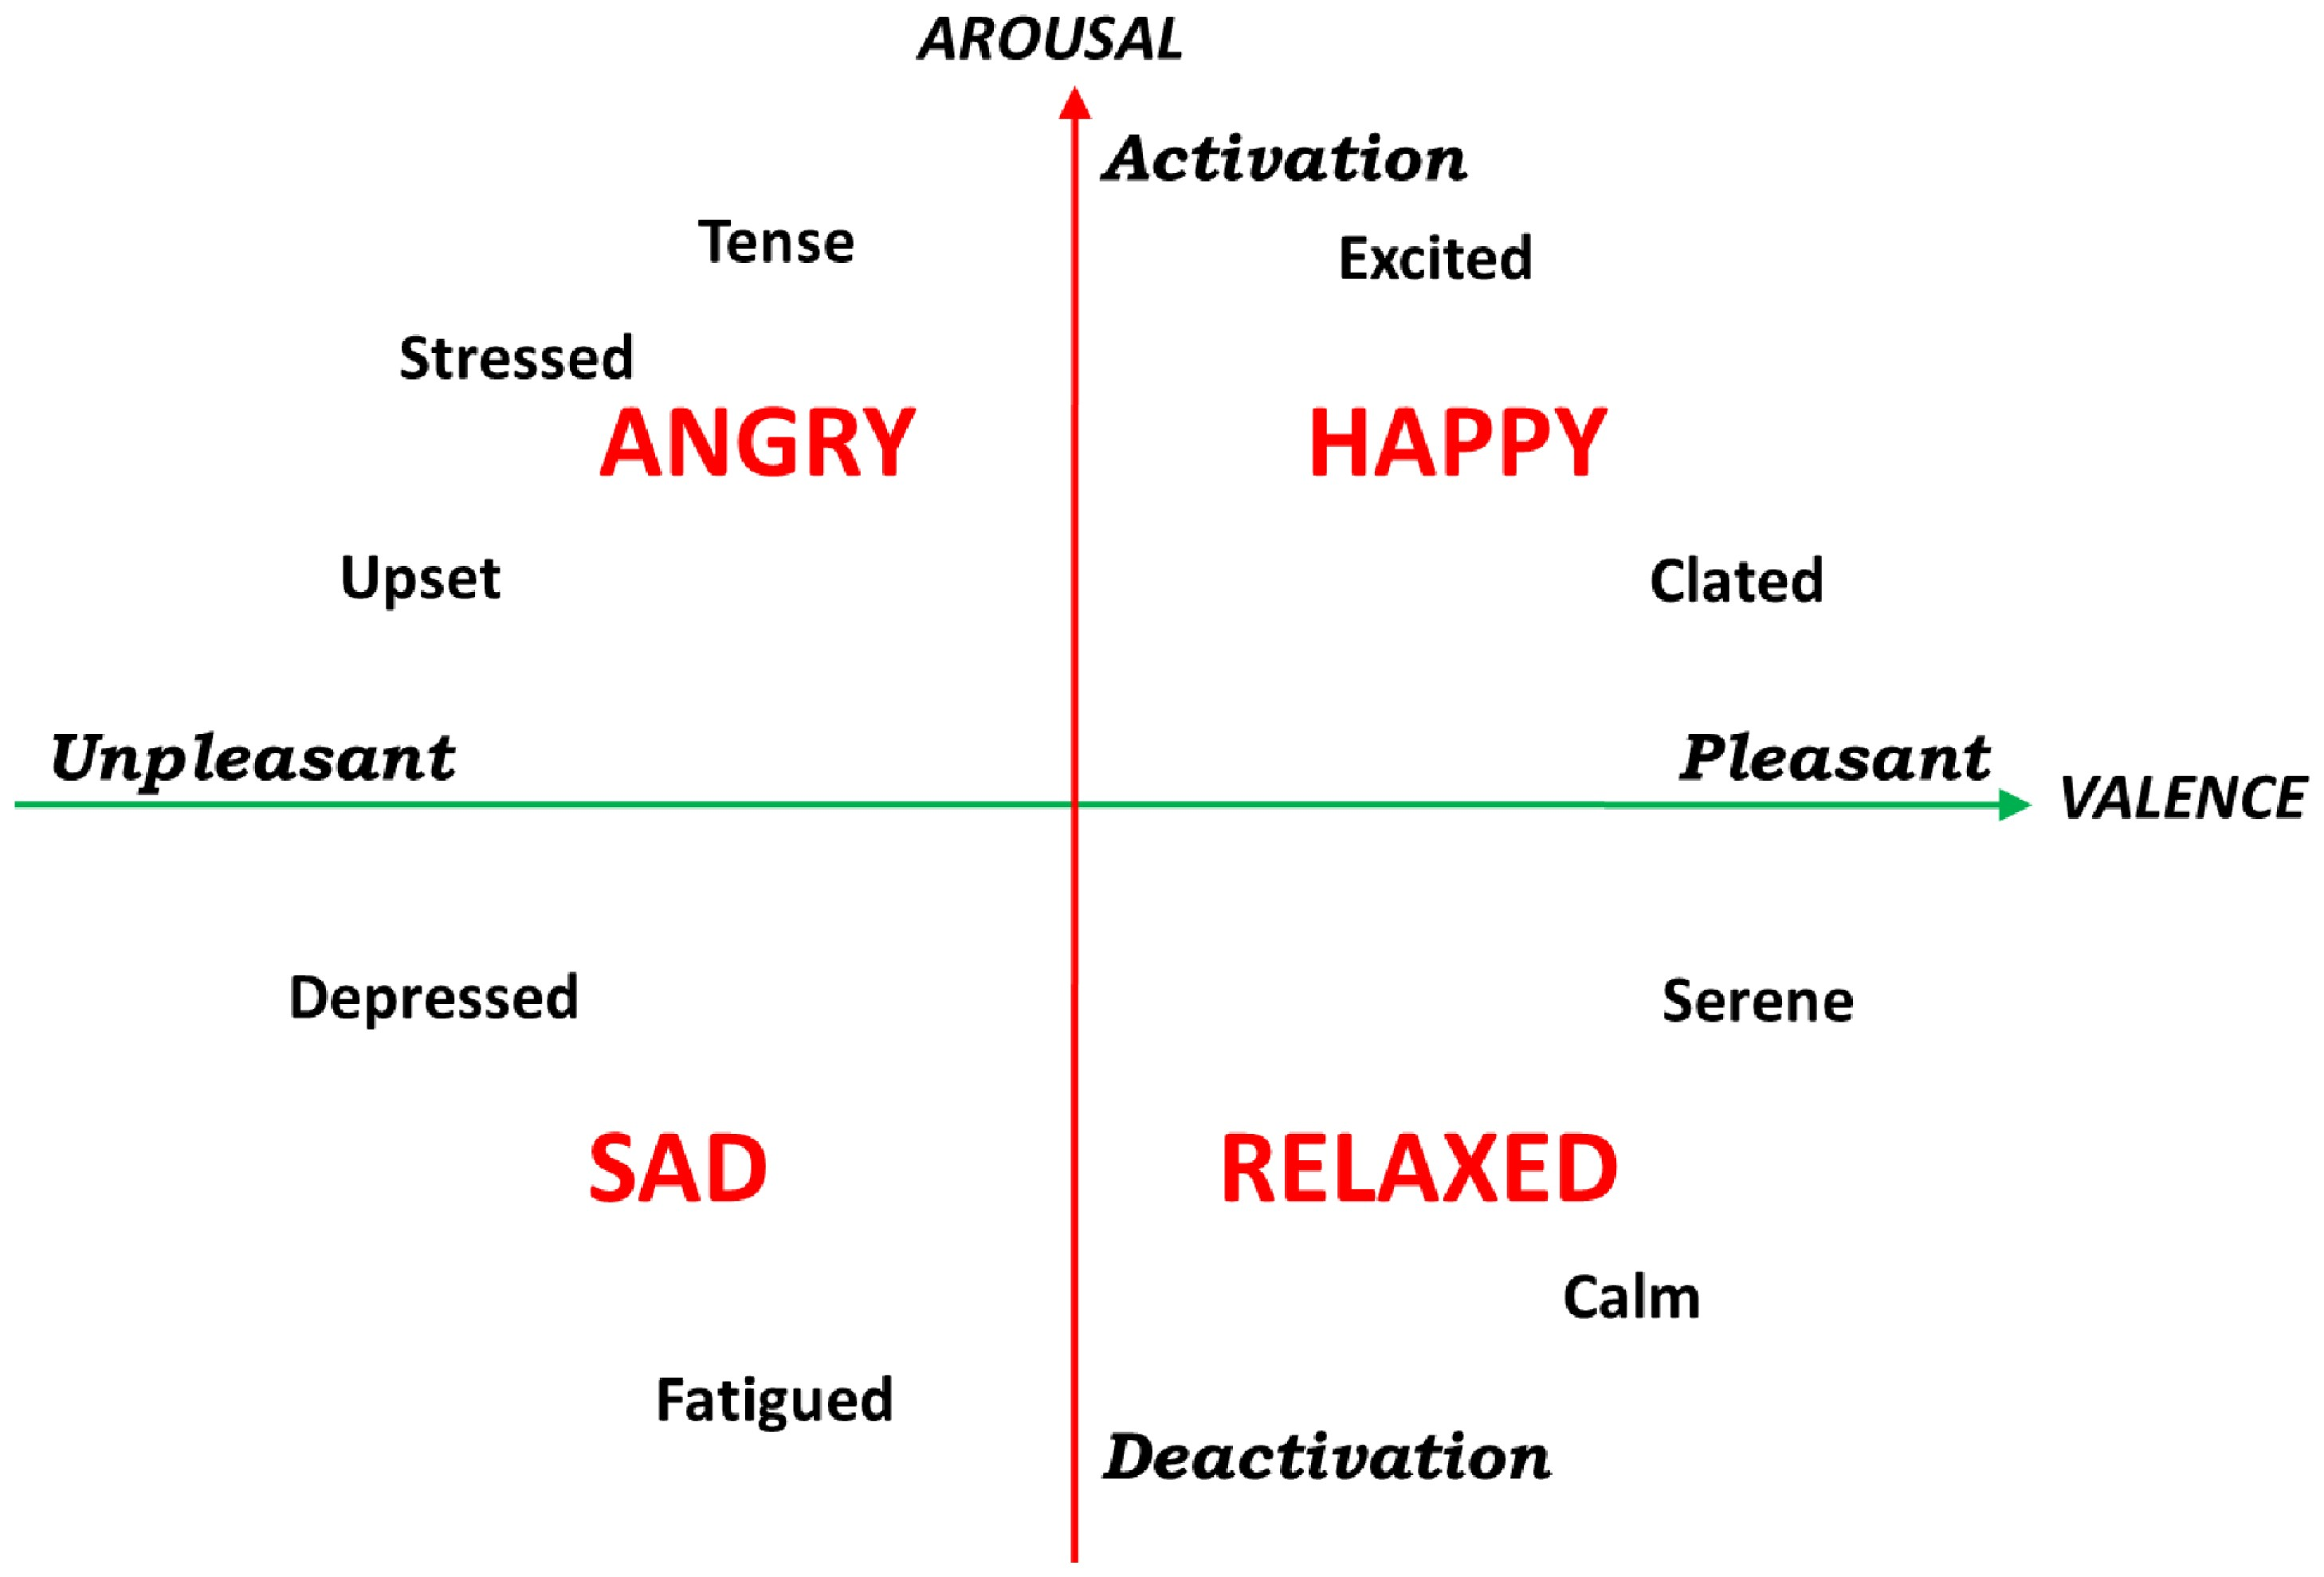

Recordemos que la base de datos DEAP está organizada como:

|Array name	|Array shape	|Array contents|
|-----------|-------------|--------------|
|data	|40 x 40 x 8064	|video/trial x channel x data|
|labels	|40 x 4	|video/trial x label (valence, arousal, dominance, liking)|

Las etiquetas se encuentran en el campo de "label":

En la matriz "labels", que tiene una estructura de 40 filas y 4 columnas, se organiza de la siguiente manera: "video/trial" en las filas y "label" en las columnas, donde se registran las valoraciones de valencia, excitación, dominancia y agradabilidad.

* **Valence:** Representa la puntuación de valencia, un número decimal entre 1 y 9.
* **Arousal:** Corresponde a la puntuación de excitación, también un número decimal entre 1 y 9.
* **Dominance:** Indica la puntuación de dominancia, un número decimal entre 1 y 9.
* **Liking:** Refleja la puntuación de agrado, que oscila entre 1 y 9.

In [80]:
print(etiquetas1)

[[8.22 7.78 4.   7.42]
 [6.05 7.9  5.06 5.01]
 [7.5  6.68 7.14 7.58]
 [7.38 6.72 6.18 6.94]
 [3.99 7.06 7.99 8.03]
 [7.19 6.83 6.55 7.67]
 [6.85 5.53 6.18 7.62]
 [7.   6.21 7.18 7.96]
 [7.69 7.44 8.42 8.92]
 [1.88 8.03 7.09 4.05]
 [8.03 4.26 5.73 7.85]
 [7.63 2.6  5.08 7.01]
 [6.79 3.19 3.88 6.85]
 [8.03 4.36 7.99 7.99]
 [7.08 3.37 5.14 7.17]
 [3.96 2.35 3.65 4.51]
 [6.06 3.32 6.28 6.04]
 [8.09 3.15 5.08 7.53]
 [7.55 5.92 6.06 5.23]
 [7.33 6.63 3.27 4.65]
 [1.03 6.09 1.94 3.78]
 [4.1  3.14 3.01 5.01]
 [2.41 5.95 2.69 6.96]
 [2.36 6.19 2.45 5.71]
 [3.87 3.09 3.06 6.36]
 [3.28 2.32 4.   6.77]
 [5.81 3.09 3.97 6.74]
 [2.53 2.96 2.1  6.  ]
 [2.92 5.96 3.24 6.53]
 [1.1  5.94 3.14 7.04]
 [3.26 6.49 6.27 5.82]
 [1.99 6.95 7.01 3.4 ]
 [3.18 5.83 3.81 2.9 ]
 [2.5  6.08 2.73 1.09]
 [2.68 6.17 3.68 3.49]
 [2.01 6.21 6.13 2.01]
 [3.47 5.96 4.04 2.4 ]
 [2.26 5.77 3.23 3.13]
 [6.65 7.06 7.78 2.78]
 [6.68 6.86 6.   5.23]]


### Gráfica del espacio emocional Arousal-Valence

Arousal Baja - Media y Alta
[1-3,4-6,7-9]

Valencia Baja - Media y Alta
[1-3,4-6,7-9]

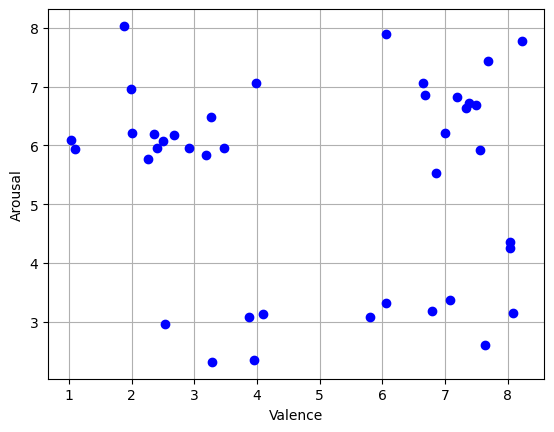

In [88]:
Valence1 = etiquetas1[:,0]
Arousal1 = etiquetas1[:,1]

plt.plot(Valence1, Arousal1,'ob')
plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

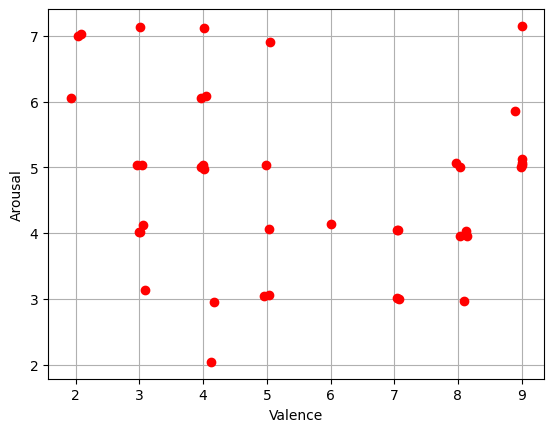

In [93]:
Valence2 = etiquetas2[:,0]
Arousal2 = etiquetas2[:,1]

plt.plot(Valence2, Arousal2,'or')
plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

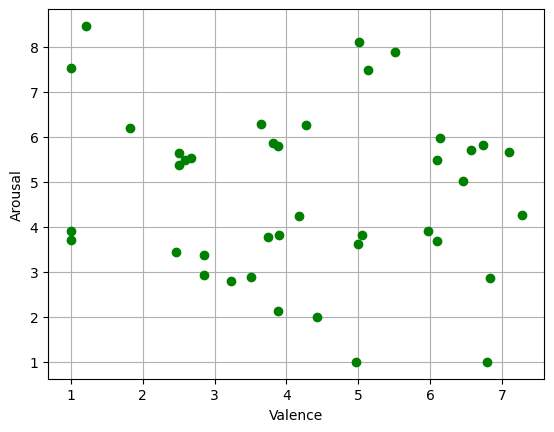

In [94]:
Valence3 = etiquetas3[:,0]
Arousal3 = etiquetas3[:,1]

plt.plot(Valence3, Arousal3,'og')
plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

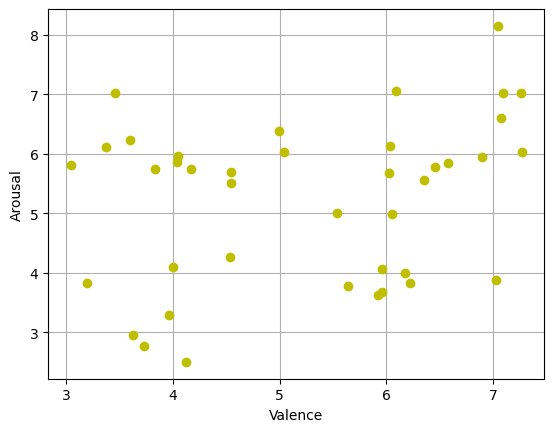

In [95]:
Valence4 = etiquetas4[:,0]
Arousal4 = etiquetas4[:,1]

plt.plot(Valence4, Arousal4,'oy')
plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

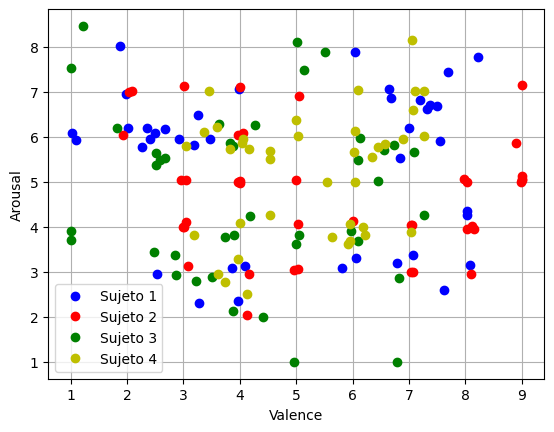

In [98]:
plt.plot(Valence1, Arousal1,'ob', label="Sujeto 1")
plt.plot(Valence2, Arousal2,'or', label="Sujeto 2")
plt.plot(Valence3, Arousal3,'og', label="Sujeto 3")
plt.plot(Valence4, Arousal4,'oy', label="Sujeto 4")

plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')

plt.legend()
plt.show()

### **Conclusiones**

### **Referencias**

[1] DEAPdataset, "A dataset for emotion analysis using EEG, physiological, and video signals," consultado el 21 de septiembre de 2023. [En línea]. Disponible en: http://www.eecs.qmul.ac.uk/mmv/datasets/deap/index.html

[2] S. Koelstra, C. Muhl, M. Soleymani, J. Lee, A. Yazdani, T. Ebrahimi, T. Pun, A. Nijholt, and I. Patras, “Deap: A database for emotion analysis ;using physiological signals,” IEEE Transactions on Affective Computing, vol. 3,
no. 1, pp. 18–31, 2012.